In [1]:
from pathlib import Path
import os

if Path.cwd().name != 'src':
    os.chdir('./src')

In [2]:
from maxarseg.assemble import names
events_names = names.get_all_events()
for i, e_n in enumerate(events_names):
    print(i, e_n)

0 southafrica-flooding22
1 Kalehe-DRC-Flooding-5-8-23
2 shovi-georgia-landslide-8Aug23
3 Emilia-Romagna-Italy-flooding-may23
4 NWT-Canada-Aug-23
5 Libya-Floods-Sept-2023
6 Gambia-flooding-8-11-2022
7 New-Zealand-Flooding23
8 Hurricane-Fiona-9-19-2022
9 Hurricane-Idalia-Florida-Aug23
10 Hurricane-Ian-9-26-2022
11 yellowstone-flooding22
12 pakistan-flooding22
13 Morocco-Earthquake-Sept-2023
14 Indonesia-Earthquake22
15 cyclone-emnati22
16 Kahramanmaras-turkey-earthquake-23
17 Marshall-Fire-21-Update
18 India-Floods-Oct-2023
19 Maui-Hawaii-fires-Aug-23
20 tonga-volcano21
21 BayofBengal-Cyclone-Mocha-May-23
22 Sudan-flooding-8-22-2022


In [3]:
from maxarseg.configs import SegmentConfig
config = SegmentConfig(batch_size = 1, device='cuda:2', size = 600, stride = 400)

./.venv/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased

- GD model device: cuda:2
- Efficient SAM device: cuda:2


In [4]:
from maxarseg.assemble import holders

event = holders.Event(events_names[6], seg_config = config, when='pre')
print(event.region_name)

all_mosaics_names = event.all_mosaics_names
print(all_mosaics_names)

m0 = event.mosaics[all_mosaics_names[0]]
print(f'Number of tiles: {m0.tiles_num}')

AfricaWest-Full
['10300100CFC9A500', '105001002BD68F00', '1040010073D77D00']
Number of tiles: 18


In [5]:
m0.set_build_gdf()


Buildings: found 3 links matching: [33303200, 3330320, 333032]


In [6]:
from torchgeo.datasets import stack_samples
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np
from time import time
import warnings
import rasterio
import torch

from maxarseg.samplers import samplers, samplers_utils
from maxarseg.geo_datasets import geoDatasets
from maxarseg.ESAM_segment import segment, segment_utils
from maxarseg.detect import detect
from maxarseg import output


# Ignore all warnings
warnings.filterwarnings('ignore')

In [7]:
seed = 0

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


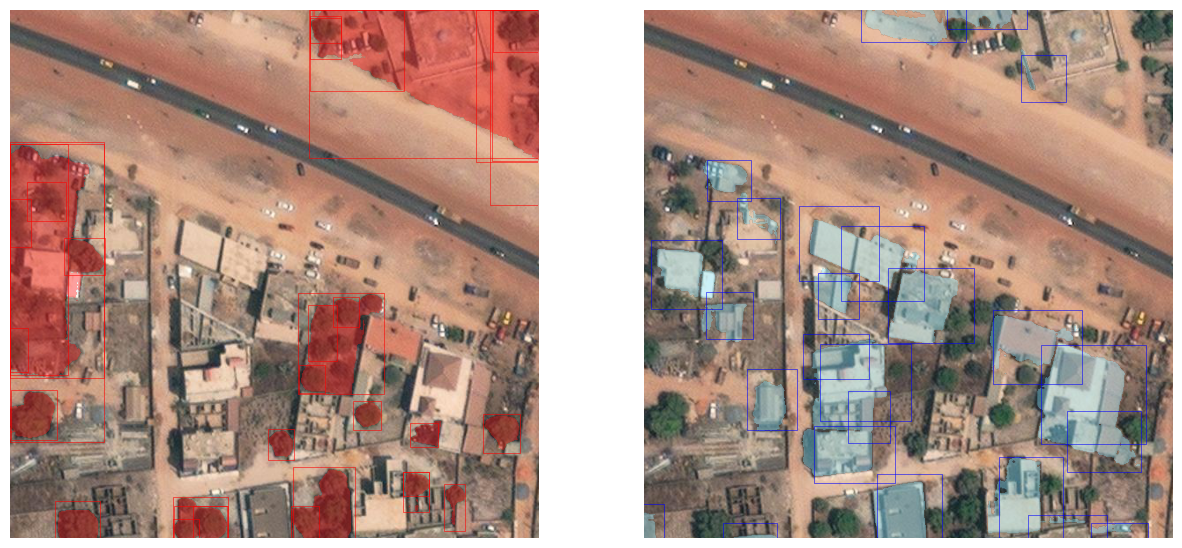

In [8]:
config.ext_mt_build_box = 10
torch.manual_seed(seed)
m0.seg_tree_and_build_rnd_samples(m0.tiles_paths[17])

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


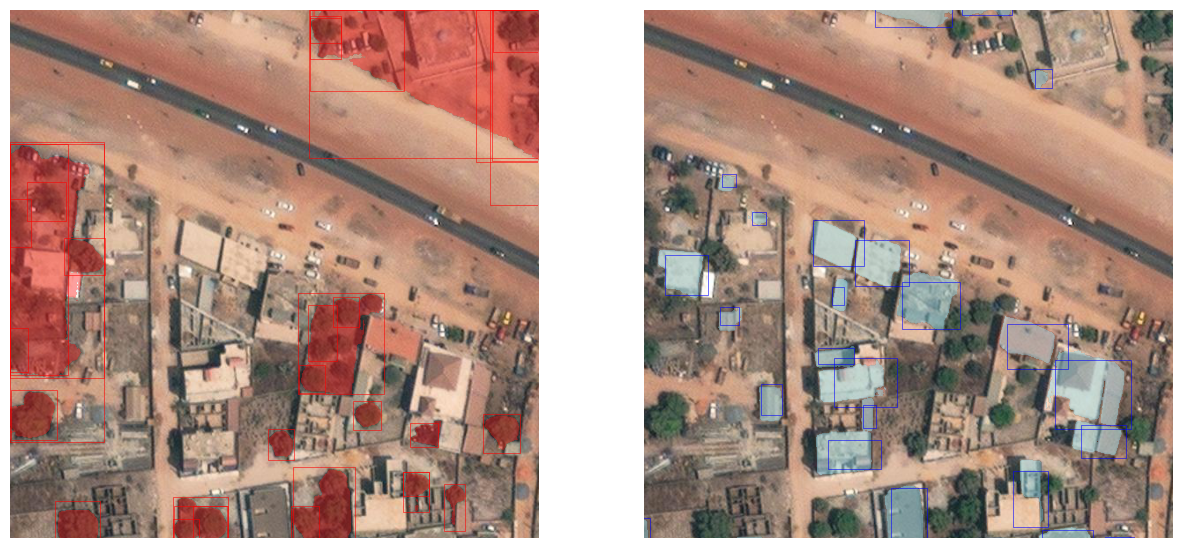

In [9]:
#config
config.ext_mt_build_box = 0
torch.manual_seed(seed)
m0.seg_tree_and_build_rnd_samples(m0.tiles_paths[17])